# Cats Dogs Image Classification

## Menyiapkan Library yang Dibutuhan

In [1]:
import tensorflow as tf
import urllib.request
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_url = 'https://github.com/wildanmjjhd29/Dogs-CatsImage/releases/download/v1.0/archive_17.zip'
urllib.request.urlretrieve(data_url, 'archive_17.zip')
local_file = 'archive_17.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [3]:
base_dir = '/content/data/dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

In [4]:
os.listdir(train_dir)

['cats', 'dogs']

In [5]:
os.listdir(validation_dir)

['cats', 'dogs']

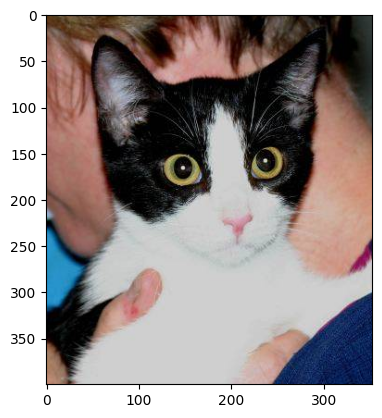

In [6]:
plt.imshow(mpimg.imread('/content/data/dataset/training_set/cats/cat.1009.jpg'))

## Menerapkan Augmentasi Gambar

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range=(0.8, 1.2),
    horizontal_flip = True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size= 100,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 8000 images belonging to 2 classes.


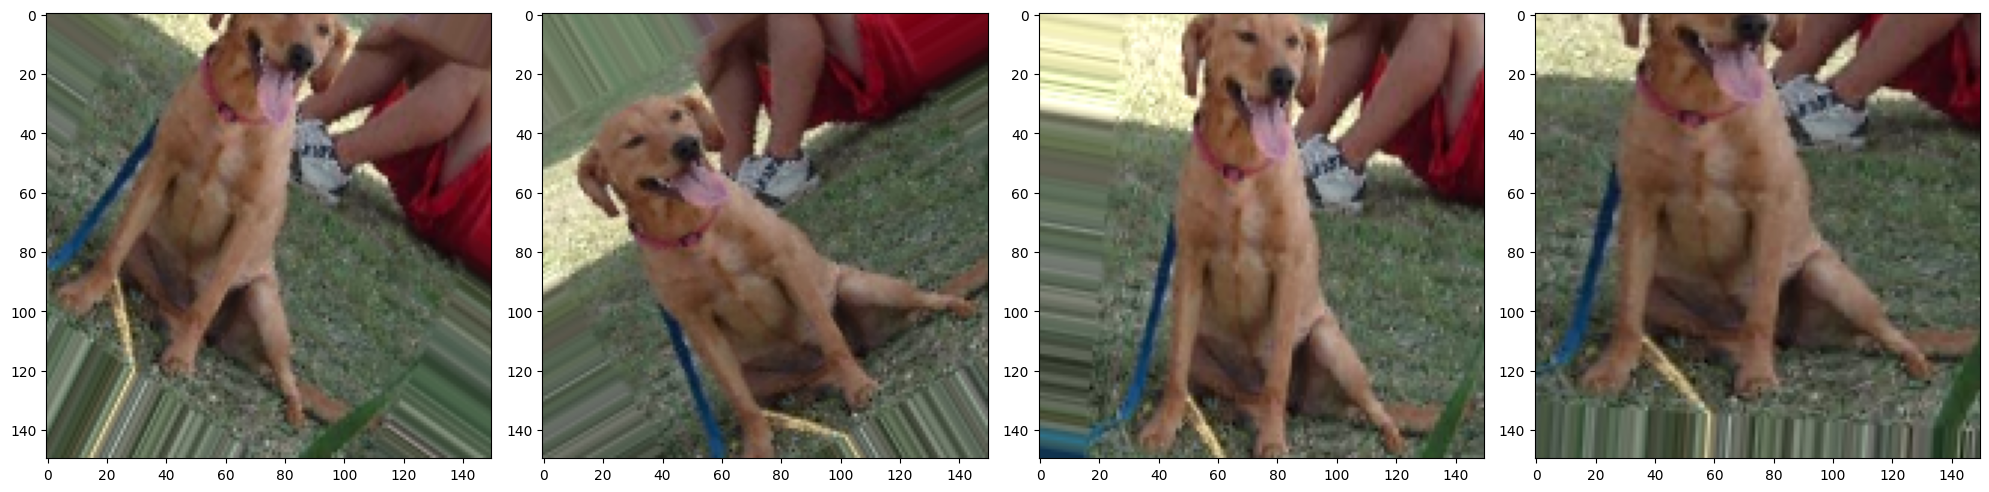

In [8]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1, len(images_arr), figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_generator[19][0][0] for i in range(4)]
plotImages(augmented_images)

In [9]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size = 100,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.


## Membuat Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 30,
    epochs = 50,
    validation_steps = 10,
    verbose = 2,
    # callbacks=[callbacks]
)

Epoch 1/50
30/30 - 35s - loss: 0.7253 - accuracy: 0.5070 - val_loss: 0.6968 - val_accuracy: 0.5040 - 35s/epoch - 1s/step
Epoch 2/50
30/30 - 28s - loss: 0.6909 - accuracy: 0.5290 - val_loss: 0.6921 - val_accuracy: 0.4970 - 28s/epoch - 917ms/step
Epoch 3/50
30/30 - 27s - loss: 0.6909 - accuracy: 0.5053 - val_loss: 0.6827 - val_accuracy: 0.5210 - 27s/epoch - 890ms/step
Epoch 4/50
30/30 - 26s - loss: 0.6824 - accuracy: 0.5513 - val_loss: 0.6593 - val_accuracy: 0.5770 - 26s/epoch - 858ms/step
Epoch 5/50
30/30 - 26s - loss: 0.6818 - accuracy: 0.5540 - val_loss: 0.6688 - val_accuracy: 0.5980 - 26s/epoch - 868ms/step
Epoch 6/50
30/30 - 26s - loss: 0.6756 - accuracy: 0.5667 - val_loss: 0.6489 - val_accuracy: 0.5980 - 26s/epoch - 856ms/step
Epoch 7/50
30/30 - 26s - loss: 0.6565 - accuracy: 0.6060 - val_loss: 0.8086 - val_accuracy: 0.5600 - 26s/epoch - 854ms/step
Epoch 8/50
30/30 - 25s - loss: 0.6529 - accuracy: 0.6037 - val_loss: 0.6435 - val_accuracy: 0.6270 - 25s/epoch - 845ms/step
Epoch 9/50


In [14]:
def plot_acc_loss(history):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].set_title('Loss')
  ax[0].plot(history.epoch, history.history['loss'],label = 'Train Loss')
  ax[0].plot(history.epoch, history.history['val_loss'],label = 'Valid Loss')
  ax[0].legend()

  ax[1].set_title('Accuracy')
  ax[1].plot(history.epoch, history.history['accuracy'],label = 'Train Accuracy')
  ax[1].plot(history.epoch, history.history['val_accuracy'],label = 'Valid Accuracy')
  ax[1].legend()

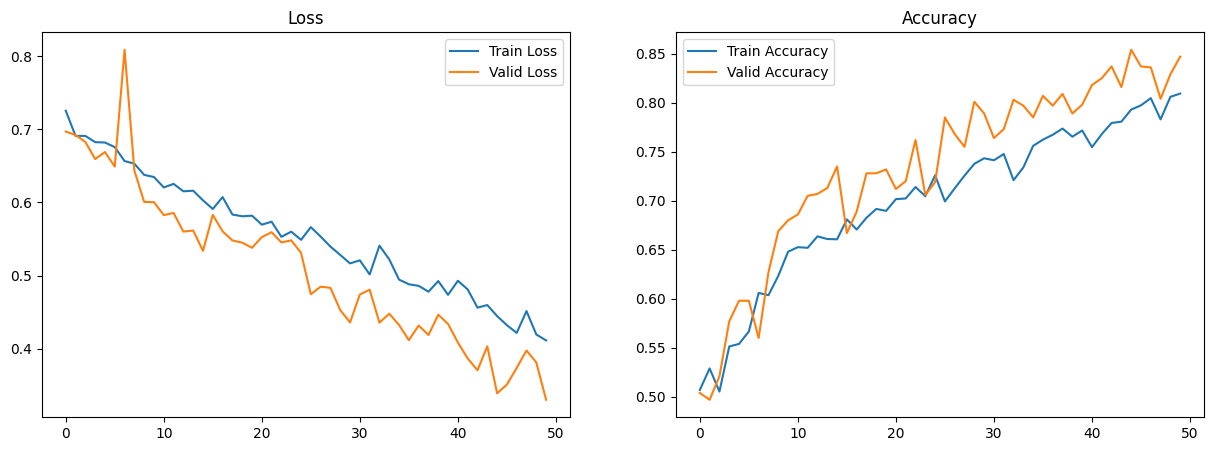

In [15]:
plot_acc_loss(history)

Saving cute-domestic-kitten-sits-window-staring-outside-generative-ai.jpg to cute-domestic-kitten-sits-window-staring-outside-generative-ai.jpg
1/1 [==============================] - 0s 386ms/step


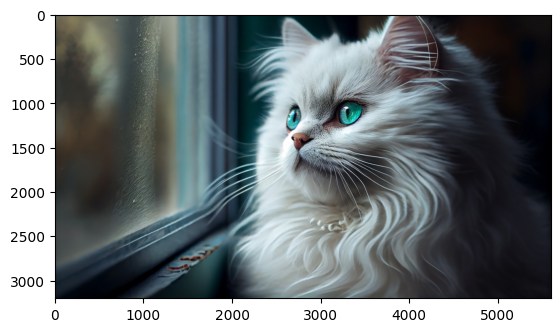

It is a Cat


In [16]:
uploaded = files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.imshow(mpimg.imread(path))
  plt.show()
  if classes == 1:
    print('It is a Dog')
  else:
    print('It is a Cat')

Saving top-20-small-dog-breeds.jpeg.jpg to top-20-small-dog-breeds.jpeg (1).jpg
1/1 [==============================] - 0s 19ms/step


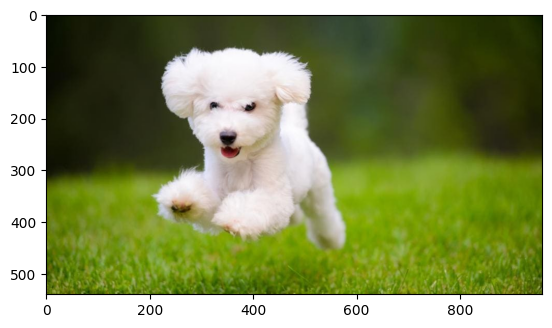

It is a Dog


In [19]:
uploaded = files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.imshow(mpimg.imread(path))
  plt.show()
  if classes == 1:
    print('It is a Dog')
  else:
    print('It is a Cat')